**<font color = 'blue' size = 38>INTRODUCTION TO WEB SCRAPING & PANDAS </font>**

# <font color = 'orange'>Requirements specified for Web Scraping</font>

In [ ]:
# Import all modules that are required
import numpy as np
import pandas as pd


import requests
from bs4 import BeautifulSoup
from IPython.display import HTML


In [ ]:
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

# <font color = 'orange'> Start the scraping by sending HTTP request</font>



The look of the website
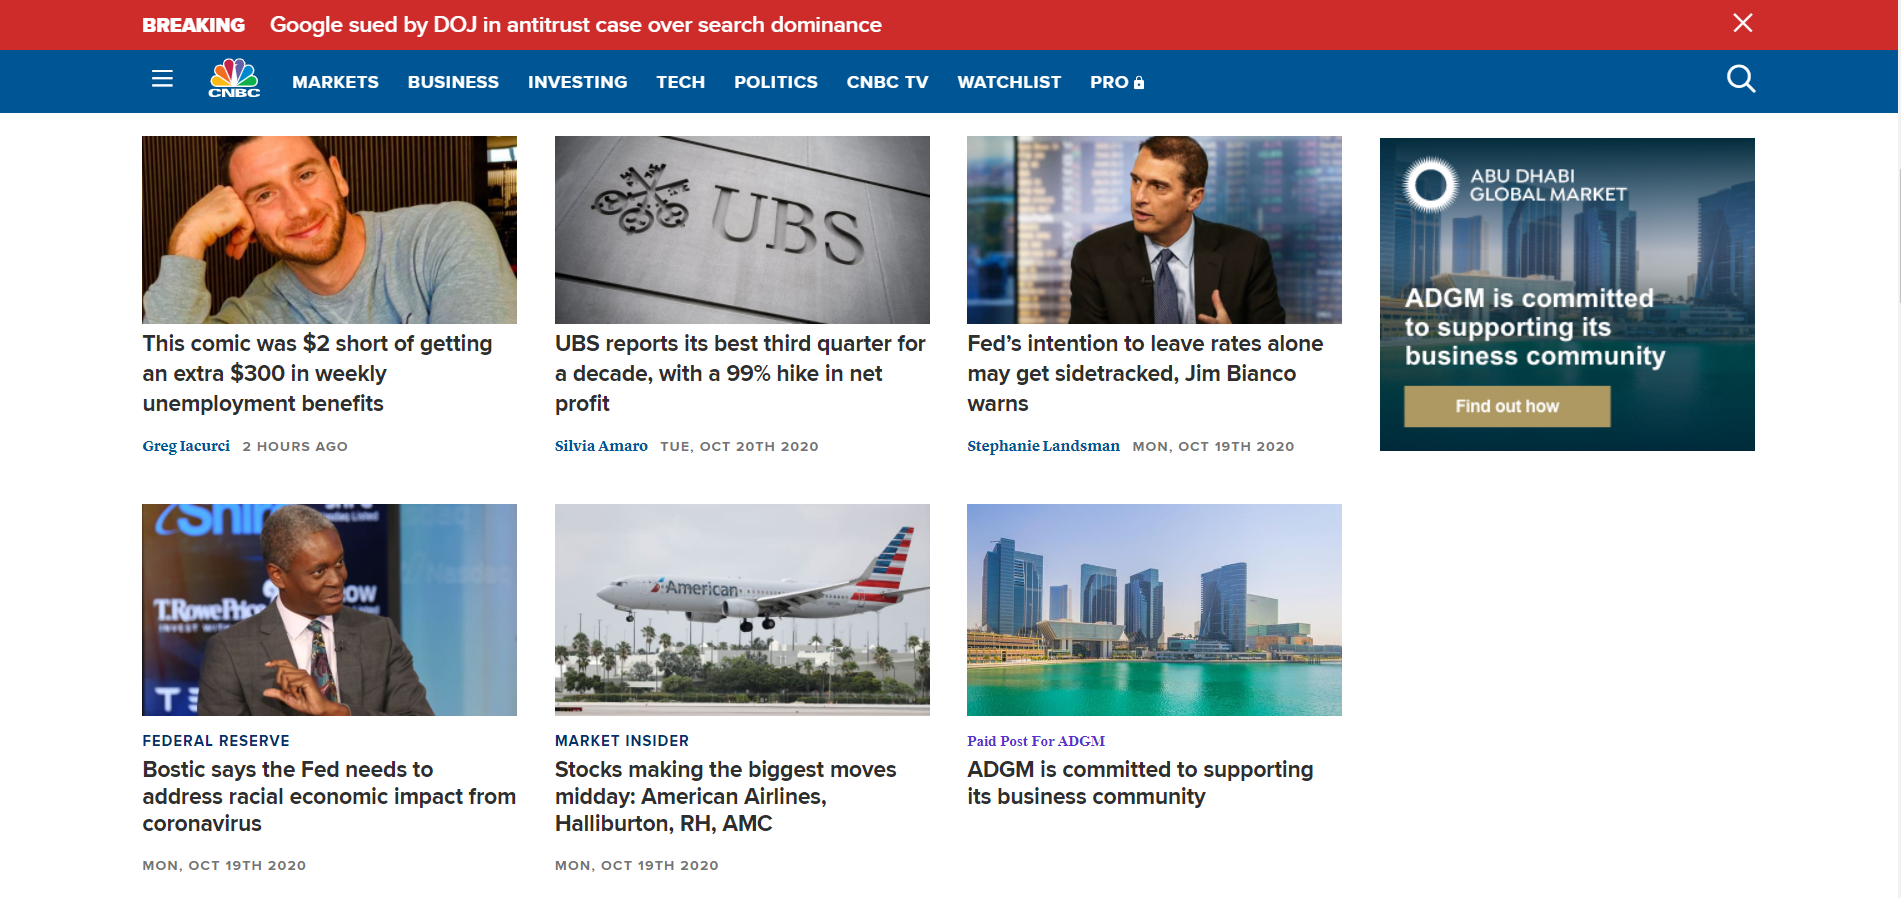

In [ ]:
snapshot_url = 'https://www.cnbc.com/finance/'

In [ ]:
snapshot = requests.get(snapshot_url)
snapshot

<Response [200]>

In [ ]:
type(snapshot)


requests.models.Response

In [ ]:
snapshot = requests.get(snapshot_url)
raw_html = snapshot.text
print(raw_html[:500])

<!DOCTYPE html><html lang="en" prefix="og=https://ogp.me/ns#" itemType="https://schema.org/WebPage"><head><script src="//fm.cnbc.com/applications/cnbc.com/resources/newrelic/agent.js"></script><link rel="preload" as="script" href="https://sb.scorecardresearch.com/beacon.js"/><title itemProp="name">Finance News</title><meta name="viewport" content="initial-scale=1.0, width=device-width"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="AssetType" content="franchise"/><meta pr


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

In [ ]:
soup = BeautifulSoup(raw_html, 'html.parser')


In [ ]:
soup.select_one('title')

<title itemprop="name">Finance News</title>

In [ ]:
soup


<!DOCTYPE html>
<html itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><script src="//fm.cnbc.com/applications/cnbc.com/resources/newrelic/agent.js"></script><link as="script" href="https://sb.scorecardresearch.com/beacon.js" rel="preload"/><title itemprop="name">Finance News</title><meta content="initial-scale=1.0, width=device-width" name="viewport"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="franchise" property="AssetType"/><meta content="10000664" property="pageNodeId"/><meta content="Latest investing news and finance headlines straight from Wall Street." itemprop="description" name="description"/><link href="https://www.cnbc.com/finance/" itemprop="url" rel="canonical"/><link href="/favicon.ico" rel="icon" type="image/png"/><meta content="website" property="og:type"/><meta content="Finance" property="og:title"/><meta content="Latest investing news and finance headlines straight from Wall Street." property="og:descriptio

# <font color = 'orange'>Extracting data</font>

<font color ='red'> Get all News Titles </font>

In [ ]:
card_titles = soup.select('.Card-title ')
len(card_titles)


34

In [ ]:
HTML(card_titles[0].prettify())


In [ ]:
str(card_titles[0].prettify())


'<a class="Card-title" href="https://www.cnbc.com/2020/10/20/ubs-earnings-q3-2020.html" target="">\n <div>\n  UBS reports its best third quarter for a decade, with a 99% hike in net profit\n </div>\n</a>'

In [ ]:
#all titles
titles = []
for i in range(0,len(card_titles)):
  titles.append(card_titles[i].select_one('div').text)

In [ ]:
titles

['UBS reports its best third quarter for a decade, with a 99% hike in net profit',
 'Fed’s intention to leave rates alone may get sidetracked, Jim Bianco warns',
 'Bostic says the Fed needs to address racial economic impact from coronavirus',
 'Stocks making the biggest moves midday: American Airlines, Halliburton, RH, AMC',
 'European banks are set for a better earnings season as bad loan payouts stabilize',
 'Watch Fed Chair Jerome Powell speak live to the International Monetary Fund',
 'Stocks making the biggest moves in the premarket: Concho Resources, Halliburton, AstraZeneca & more',
 'Active funds are not being muscled out by ETFs, Refinitiv expert says',
 'Acorns partners with ZipRecruiter to launch a job portal within the finance app ',
 'Why tech IPOs are flourishing in the U.S. and China — but not Europe',
 'Ant Group wins approval from Chinese regulators for the Hong Kong leg of its IPO',
 "Dow closes 400 points lower with one day left until Pelosi's stimulus deadline",
 'T

<font color ='red'> Get all News Dates </font>

In [ ]:
card_times = soup.select('.Card-time')
len(card_times)

34

In [ ]:
str(card_times[0].prettify())


'<span class="Card-time">\n 3 hours ago\n</span>'

In [ ]:
card_times = soup.find_all('span', {'class': 'Card-time'})

In [ ]:
#all times
times = []
for i in range(0,len(card_times)):
  times.append(card_times[i].text)

In [ ]:
times

['3 hours ago',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Mon, Oct 19th 2020',
 'Sun, Oct 18th 2020',
 'Sat, Oct 17th 2020',
 'Fri, Oct 16th 2020',
 'Fri, Oct 16th 2020',
 'Fri, Oct 16th 2020',
 'Fri, Oct 16th 2020',
 'Thu, Oct 15th 2020',
 'Fri, Oct 16th 2020',
 'Thu, Oct 15th 2020',
 'Thu, Oct 15th 2020',
 'Thu, Oct 15th 2020',
 'Thu, Oct 15th 2020',
 'Thu, Oct 15th 2020',
 'Thu, Oct 15th 2020',
 'Thu, Oct 15th 2020',
 'Wed, Oct 14th 2020',
 'Wed, Oct 14th 2020',
 'Thu, Oct 15th 2020',
 'Wed, Oct 14th 2020',
 'Wed, Oct 14th 2020',
 'Wed, Oct 14th 2020',
 'Wed, Oct 14th 2020']

In [ ]:
#time of publication,  today's date
from datetime import date

times = []
for i in range(0,len(card_times)):
  times.append(card_times[i].text+", today: "+str(date.today()))

In [ ]:
times

['3 hours ago, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Mon, Oct 19th 2020, today: 2020-10-20',
 'Sun, Oct 18th 2020, today: 2020-10-20',
 'Sat, Oct 17th 2020, today: 2020-10-20',
 'Fri, Oct 16th 2020, today: 2020-10-20',
 'Fri, Oct 16th 2020, today: 2020-10-20',
 'Fri, Oct 16th 2020, today: 2020-10-20',
 'Fri, Oct 16th 2020, today: 2020-10-20',
 'Thu, Oct 15th 2020, today: 2020-10-20',
 'Fri, Oct 16th 2020, today: 2020-10-20',
 'Thu, Oct 15th 2020, today: 2020-10-20',
 'Thu, Oct 15th 2020, today: 2020-10-20',
 'Thu, Oct 15th 2020, today: 2020-10-20',
 'Thu, Oct 15th 2020, today: 2020-10-20',

<font color ='red'> Get all News Classes </font>

In [ ]:
card_classes = soup.select('.Card-eyebrow')
len(card_classes)

29

In [ ]:
str(card_classes[0].prettify())


'<a class="Card-eyebrow" href="https://www.cnbc.com/federal-reserve/">\n <div>\n  Federal Reserve\n </div>\n</a>'

In [ ]:
#all classes
classes = []
for i in range(0,len(card_classes)):
  classes.append(card_classes[i].select_one('div').text)

In [ ]:
classes =  ['Top News','Top News','Top News','Top News','Top News'] + classes

In [ ]:
classes


['Top News',
 'Top News',
 'Top News',
 'Top News',
 'Top News',
 'Federal Reserve',
 'Market Insider',
 'Investing',
 'Finance',
 'Tech',
 'Tech',
 'Markets',
 'Trading Nation',
 'Activist Spotlight',
 'Markets',
 'Market Insider',
 'Personal Finance',
 'Market Insider',
 'China Economy',
 'Markets',
 'Market Insider',
 'US Economy',
 'Federal Reserve',
 'Trader Talk',
 'Market Insider',
 'Finance',
 'Asia Markets',
 'China Economy',
 'Trading Nation',
 'Markets',
 'Market Insider',
 'Finance',
 'Market Insider',
 'Commentary']

In [ ]:
len(classes)

34

# <font color = 'orange'> Create a Pandas DataFrame </font>

In [ ]:
#first way

matrix = []
for i in range(0, len(classes)):
    node = {}
    node['Title'] = titles[i]
    node['Date'] = times[i]
    node['Class'] = classes[i]
    matrix.append(node)

df = pd.DataFrame(matrix)

In [ ]:
df

Title  ...               Class
0   UBS reports its best third quarter for a decad...  ...            Top News
1   Fed’s intention to leave rates alone may get s...  ...            Top News
2   Bostic says the Fed needs to address racial ec...  ...            Top News
3   Stocks making the biggest moves midday: Americ...  ...            Top News
4   European banks are set for a better earnings s...  ...            Top News
5   Watch Fed Chair Jerome Powell speak live to th...  ...     Federal Reserve
6   Stocks making the biggest moves in the premark...  ...      Market Insider
7   Active funds are not being muscled out by ETFs...  ...           Investing
8   Acorns partners with ZipRecruiter to launch a ...  ...             Finance
9   Why tech IPOs are flourishing in the U.S. and ...  ...                Tech
10  Ant Group wins approval from Chinese regulator...  ...                Tech
11  Dow closes 400 points lower with one day left ...  ...             Markets
12  This historical trend points to strong fourth ...  ...      Trading Nation
13  Starboard looks to keep its great track record...  ...  Activist Spotlight
14  Rockefeller heirs call on banks to stop lendin...  ...             Markets
15  Stocks making the biggest moves midday: Boeing...  ...      Market Insider
16  Here are some ways to get health insurance if ...  ...    Personal Finance
17  Stocks making the biggest moves premarket: Pfi...  ...      Market Insider
18  China will take on more debt if that's what it...  ...       China Economy
19  Dow rises 100 points, snaps 3-day losing strea...  ...             Markets
20  Stocks making moves after hours: Intuitive Sur...  ...      Market Insider
21  ‘No doubt’ that crucial U.S. fiscal stimulus i...  ...          US Economy
22  Fed's Quarles sees need for more reforms to sh...  ...     Federal Reserve
23  Blockbuster earnings results may not be enough...  ...         Trader Talk
24  Stocks making the biggest moves premarket: Wal...  ...      Market Insider
25  Morgan Stanley tops revenue estimates by $1 bi...  ...             Finance
26  South Korean boy band BTS’s label makes a stro...  ...        Asia Markets
27  China’s pork prices rise at the slowest pace i...  ...       China Economy
28  Trend points to inflation comeback that’s ‘per...  ...      Trading Nation
29  Stocks close lower for a third day amid concer...  ...             Markets
30  Stocks making the biggest moves after hours: U...  ...      Market Insider
31  Brokerage log-ins for sale on dark web, Robinh...  ...             Finance
32  Stocks making the biggest moves midday: Wells ...  ...      Market Insider
33  Opinion: Investing in Black-owned banks key to...  ...          Commentary

[34 rows x 3 columns]

In [ ]:
#second way

matrix = []
for i in range(0, len(classes)):
    matrix.append([titles[i],times[i],classes[i]])


df_new = pd.DataFrame(np.array(matrix),columns=['Title','Date','Class'])

In [ ]:
df_new

Title  ...               Class
0   UBS reports its best third quarter for a decad...  ...            Top News
1   Fed’s intention to leave rates alone may get s...  ...            Top News
2   Bostic says the Fed needs to address racial ec...  ...            Top News
3   Stocks making the biggest moves midday: Americ...  ...            Top News
4   European banks are set for a better earnings s...  ...            Top News
5   Watch Fed Chair Jerome Powell speak live to th...  ...     Federal Reserve
6   Stocks making the biggest moves in the premark...  ...      Market Insider
7   Active funds are not being muscled out by ETFs...  ...           Investing
8   Acorns partners with ZipRecruiter to launch a ...  ...             Finance
9   Why tech IPOs are flourishing in the U.S. and ...  ...                Tech
10  Ant Group wins approval from Chinese regulator...  ...                Tech
11  Dow closes 400 points lower with one day left ...  ...             Markets
12  This historical trend points to strong fourth ...  ...      Trading Nation
13  Starboard looks to keep its great track record...  ...  Activist Spotlight
14  Rockefeller heirs call on banks to stop lendin...  ...             Markets
15  Stocks making the biggest moves midday: Boeing...  ...      Market Insider
16  Here are some ways to get health insurance if ...  ...    Personal Finance
17  Stocks making the biggest moves premarket: Pfi...  ...      Market Insider
18  China will take on more debt if that's what it...  ...       China Economy
19  Dow rises 100 points, snaps 3-day losing strea...  ...             Markets
20  Stocks making moves after hours: Intuitive Sur...  ...      Market Insider
21  ‘No doubt’ that crucial U.S. fiscal stimulus i...  ...          US Economy
22  Fed's Quarles sees need for more reforms to sh...  ...     Federal Reserve
23  Blockbuster earnings results may not be enough...  ...         Trader Talk
24  Stocks making the biggest moves premarket: Wal...  ...      Market Insider
25  Morgan Stanley tops revenue estimates by $1 bi...  ...             Finance
26  South Korean boy band BTS’s label makes a stro...  ...        Asia Markets
27  China’s pork prices rise at the slowest pace i...  ...       China Economy
28  Trend points to inflation comeback that’s ‘per...  ...      Trading Nation
29  Stocks close lower for a third day amid concer...  ...             Markets
30  Stocks making the biggest moves after hours: U...  ...      Market Insider
31  Brokerage log-ins for sale on dark web, Robinh...  ...             Finance
32  Stocks making the biggest moves midday: Wells ...  ...      Market Insider
33  Opinion: Investing in Black-owned banks key to...  ...          Commentary

[34 rows x 3 columns]